* RNN: store the previous calculated value and consider at next timestamp.
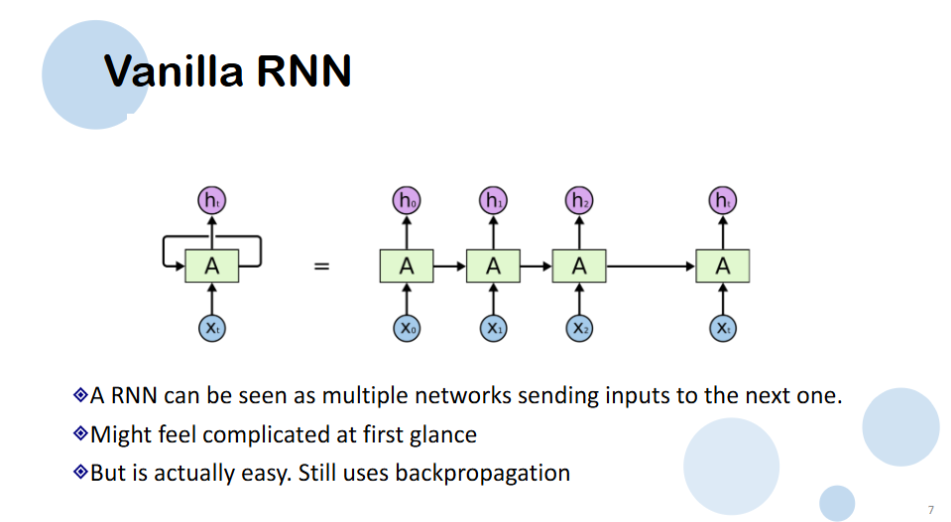

* LSTM: a more complicated RNN, use 3 gates to manipulate data more wisely.
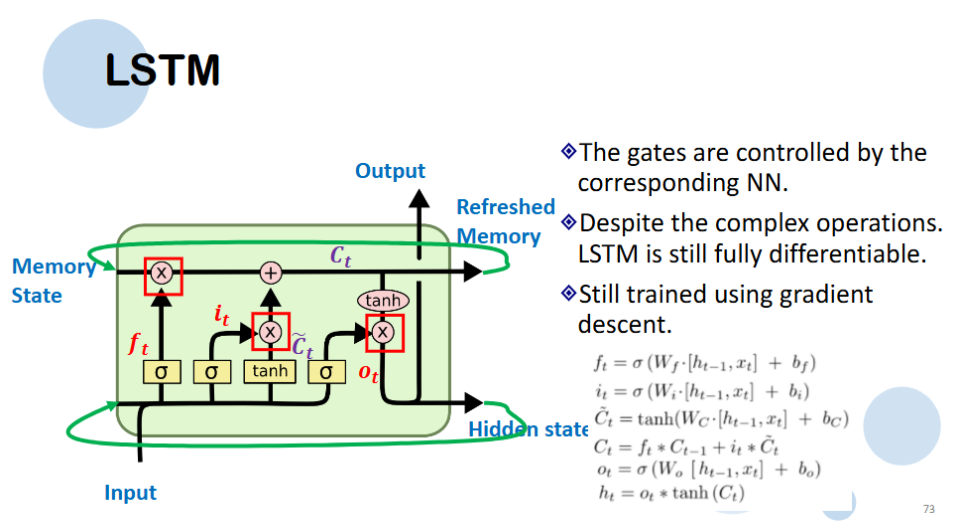

* GRU: compared to LSTM, GRU uses less gate that LSTM.
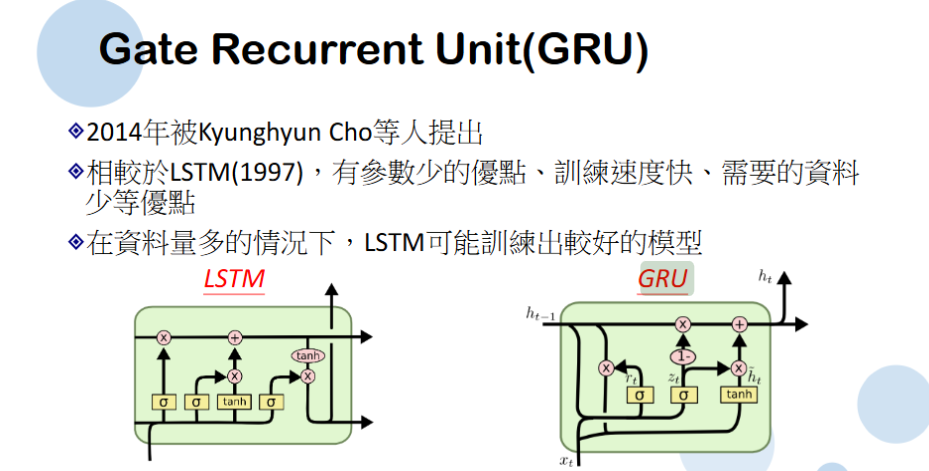

訓練作法差異:
* RNN & LSTM : 先用一個 `CNN Feature Extractor` 來嘗試抓出圖片的特徵向量，例如輸出維度為 (batch_size, channel, height, width)，之後將 channel 當作 seq_len 維度，height*width 成為 input_dim 維度，再將新向量送到 RNN 跟 LSTM 中預測。
    * Why `CNN Feature Extractor` ?  
        * 原本是先將圖片以一列一列當作 sequence，但發現效果不好，可能的原因有它取到的一列剛好都是 blank (完全沒有數字特徵)，於是它會亂猜，就會 train 不好。  
        * 所以利用 CNN 來擷取整張圖的特徵，將 CNN 所得到的向量轉成 RNN 可接受的型式，再進行訓練，這次它看了整張圖的特徵，訓練效果明顯變好。  

* GRU : 將圖片 resize 成 (28, 28)，並把數字置中，以列數為 seq_len 維度，input_dim 則為欄數，送到 GRU 當中做訓練。

結果比較：

| 模型       | 訓練準確率 | 驗證準確率 | 驗證 Precision | 驗證 Recall | 驗證 F1-score | 參數量     |
|------------|------------|------------|----------------|-------------|---------------|------------|
| RNN | 0.9324     | 0.9389     | 0.9385         | 0.9379      | 0.9381        | 108,514    |
| LSTM | 0.9254     | 0.9312     | 0.9315         | 0.9304      | 0.9307        | 214,498    |
| GRU | 0.9676     | 0.9633     | 0.9682         | 0.9650      | 0.9661        | 686,090    |


* 整體來看，GRU 有較好的 performance 表現，但其訓練參數量也是最多的。  
* RNN 與 LSTM 相比，RNN 有略勝的趨勢。  
* 同樣資料集，但有不同的前處理/模型，也可能影響訓練結果。